In [1]:
# Importing Visualization Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create path
path = r'/Users/macbook/Library/CloudStorage/OneDrive-Personal/Data Analisys/Boat Sales'

In [4]:
# import boat_data_cleaned.csv
df_boat_data_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_cleaned2.csv'), index_col=[0])

In [5]:
df_boat_data_cleaned.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views,Type_split,Fuel
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469,new boat from stock,NaN
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469,new boat from stock,NaN
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879,Used boat,Electric
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749,Used boat,NaN
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879,new boat from stock,NaN


In [6]:
df_boat_data_cleaned['Fuel'].value_counts(dropna=False)

Diesel           2782
Unleaded         2123
NaN               959
Display Model      96
Electric           30
Gas                 9
Hybrid              1
Propane             1
Name: Fuel, dtype: int64

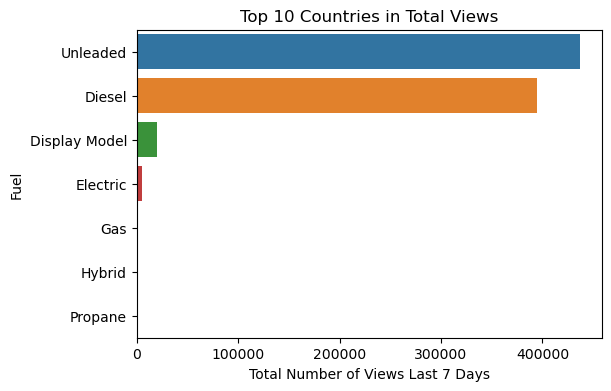

In [10]:
top10countries_by_fuel = df_boat_data_cleaned.groupby('Fuel')['Number of views last 7 days'].sum().sort_values(ascending=False)[:15]
# print(top10countries_by_fuel)

plot_data = top10countries_by_fuel
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Total Number of Views Last 7 Days', ylabel = 'Fuel', title = 'Fuel in Total Views')
plt.show()

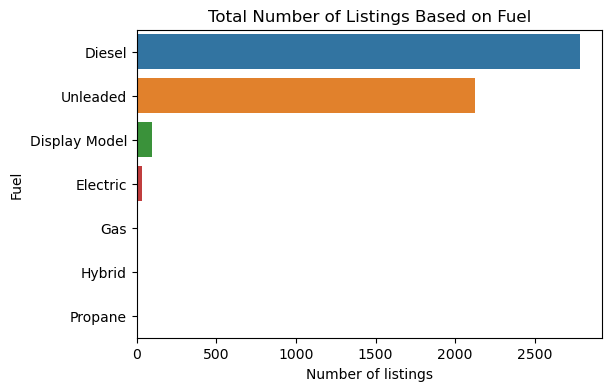

In [12]:
# plot_data = df_boat_data_cleaned[high_views]['fuel'].value_counts()[:10]
plot_data = df_boat_data_cleaned['Fuel'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (6,4))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Fuel', title = 'Total Number of Listings Based on Fuel')
plt.show()

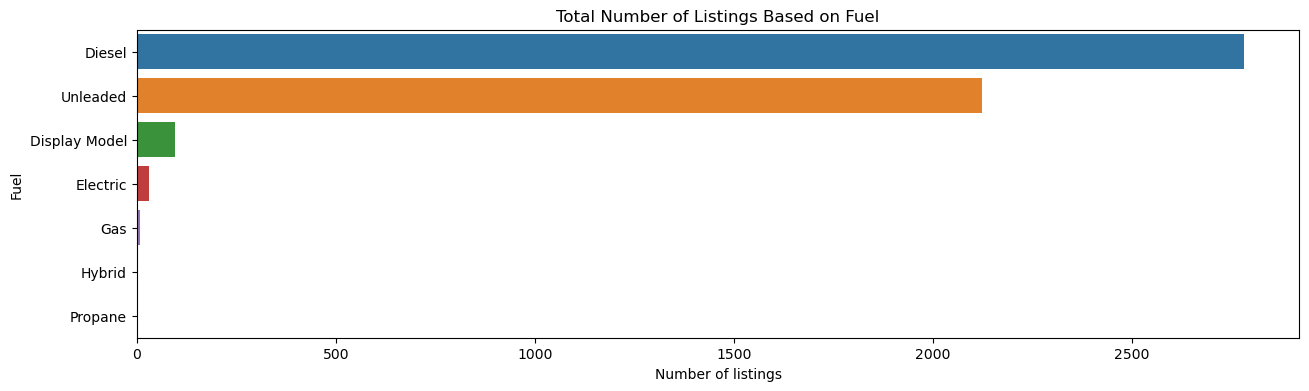

In [18]:
# plot_data = df_boat_data_cleaned[high_views]['fuel'].value_counts()[:10]
plot_data = df_boat_data_cleaned['Fuel'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (15,4))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Fuel', title = 'Total Number of Listings Based on Fuel')
plt.show()

<AxesSubplot: xlabel='Year Built', ylabel='Count'>

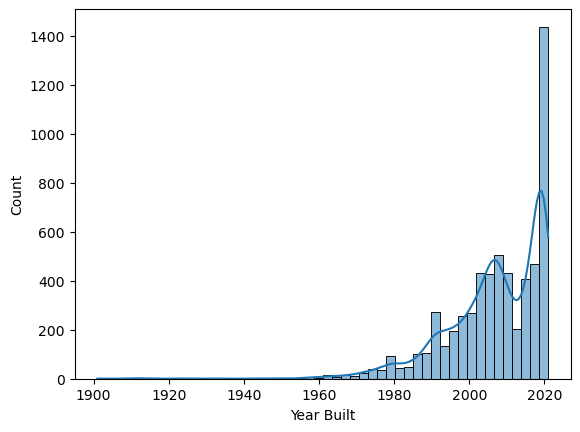

In [25]:
# creating a histogram of listing prices to visualize the distribution
sns.histplot(df_boat_data_cleaned['Year Built'], bins = 50, kde = True)

Text(0.5, 1.0, 'Year Built Distribution')

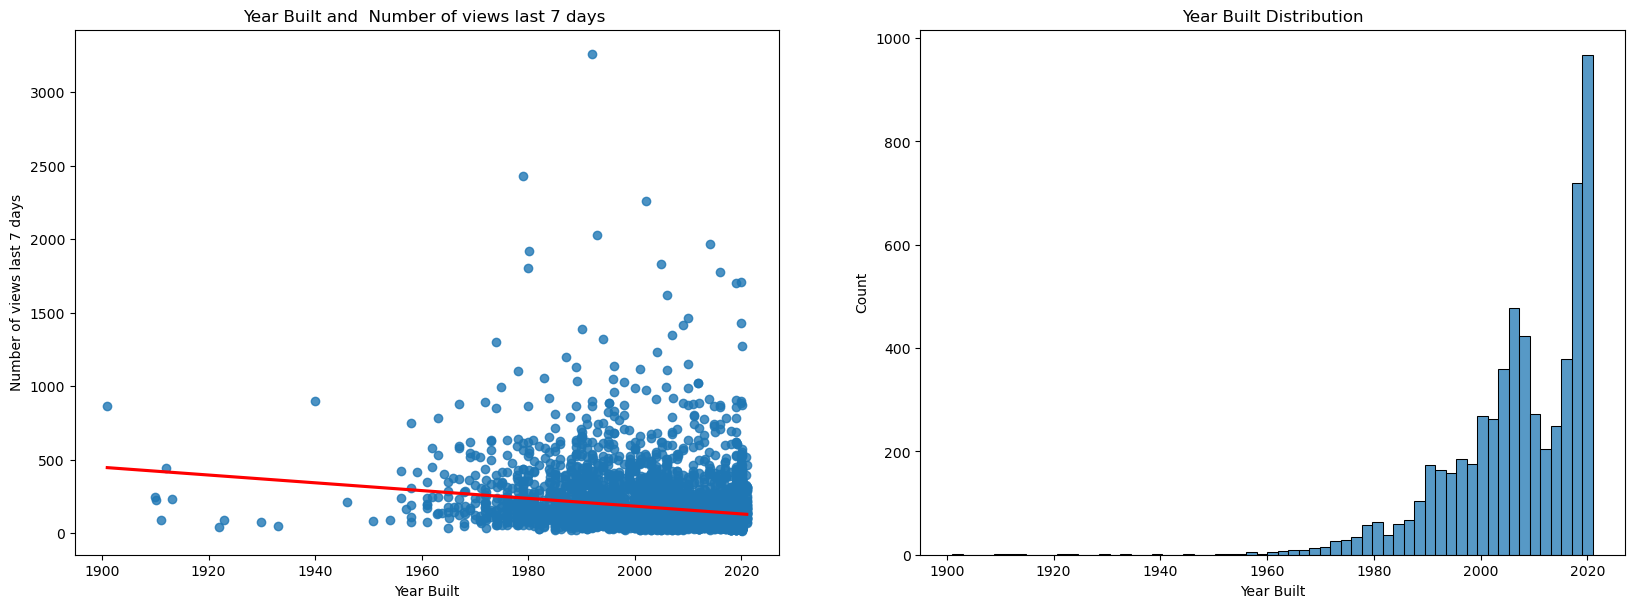

In [33]:
df_Test = df_boat_data_cleaned[df_boat_data_cleaned['Year Built'] > 0]

fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.regplot(x='Year Built', y='Number of views last 7 days', data=df_Test, line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("Year Built and  Number of views last 7 days ")
ax2 = fig.add_subplot(224)
sns.histplot(df_Test['Year Built'])
ax2.set_title("Year Built Distribution")

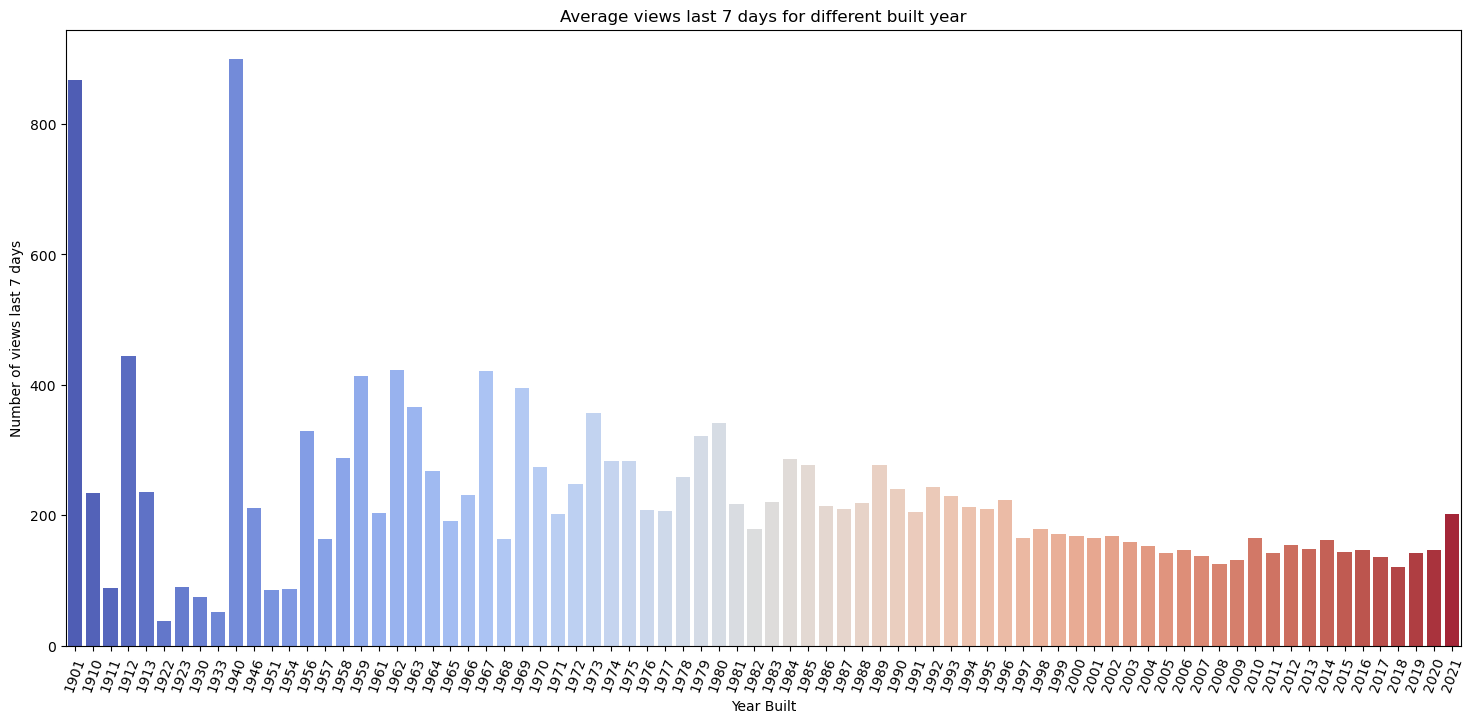

In [34]:
fig = plt.figure(figsize=(18,8) )
Country_View3= df_boat_data_cleaned.groupby('Year Built')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Year Built', y='Number of views last 7 days', data=Country_View3,
                 palette="coolwarm")
plt.title("Average views last 7 days for different built year")
plt.xticks(rotation=70)
ax1.tick_params( rotation=70)
plt.savefig('Year Built.png')